**A data science experiment using data from the KDD 2010 Educational Data Mining Challenge**

The aim of this IPython Notebook is to give you a sense of the dataset.


In [92]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
import numpy as np
import csv
from sklearn.datasets.base import Bunch
import pickle
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Get the data:
train_filepath = 'data/train.csv'
traindata = pd.read_table(train_filepath)

In [94]:
traindata.columns

Index(['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name',
       'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [95]:
# Inspect some of the training data
traindata.head(100)

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,33.0,33.0,NaN,1,0,0,1,NaN,NaN
1,9939,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,15.0,15.0,NaN,1,0,0,1,NaN,NaN
2,9940,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:16.0,2005-09-09 12:25:40.0,2005-09-09 12:25:40.0,78.0,NaN,78.0,0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:25:51.0,2005-09-09 12:27:24.0,2005-09-09 12:27:24.0,104.0,NaN,104.0,0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,6.0,6.0,NaN,1,0,0,1,Entering a given,1
5,9943,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R5C1,2005-09-09 12:27:30.0,2005-09-09 12:27:41.0,2005-09-09 12:27:41.0,2005-09-09 12:27:41.0,11.0,11.0,NaN,1,0,0,1,Entering a given,2
6,9944,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R6C1,2005-09-09 12:27:41.0,2005-09-09 12:28:41.0,2005-09-09 12:28:41.0,2005-09-09 12:28:41.0,60.0,60.0,NaN,1,0,0,1,Entering a given,3
7,9945,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R7C2,2005-09-09 12:28:50.0,2005-09-09 12:28:58.0,2005-09-09 12:28:58.0,2005-09-09 12:28:58.0,8.0,8.0,NaN,1,0,0,1,Entering a given,4
8,9946,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,ValidEquations,2005-09-09 12:31:39.0,2005-09-09 12:31:52.0,2005-09-09 12:31:52.0,2005-09-09 12:31:52.0,13.0,13.0,NaN,1,0,0,2,NaN,NaN
9,9947,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,7/10*X = 1400,2005-09-09 12:31:52.0,2005-09-09 12:32:28.0,2005-09-09 12:32:35.0,2005-09-09 12:32:35.0,43.0,NaN,43.0,0,1,0,1,NaN,NaN


In [96]:
hierarchy = traindata['Problem Hierarchy']
units, sections = [], []
for i in range(len(hierarchy)):
    units.append(hierarchy[i].split(',')[0].strip())
    sections.append(hierarchy[i].split(',')[1].strip())
    
# Now add 'Units' and 'Sections' as columns within the dataframe
traindata['Problem Unit'] = pd.Series(units, index=traindata.index)
traindata['Problem Section'] = pd.Series(sections, index=traindata.index)

cols = traindata.columns.tolist()
cols = cols[0:3]+cols[-2::]+cols[3:-2]
traindata = traindata[cols]

In [97]:
traindata = traindata[['Anon Student Id','Problem Hierarchy','Problem Unit','Problem Section','Problem Name','Problem View','Step Name','Correct First Attempt','KC(Default)','Opportunity(Default)']]
traindata.head(20)

,Anon Student Id,Problem Hierarchy,Problem Unit,Problem Section,Problem Name,Problem View,Step Name,Correct First Attempt,KC(Default),Opportunity(Default)
0,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R1C1,1,NaN,NaN
1,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R1C2,1,NaN,NaN
2,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R3C1,0,Define Variable,1
3,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R3C2,0,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R4C1,1,Entering a given,1
5,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R5C1,1,Entering a given,2
6,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R6C1,1,Entering a given,3
7,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,R7C2,1,Entering a given,4
8,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,ValidEquations,1,NaN,NaN
9,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",Unit CTA1_13,Section CTA1_13-1,PROP04,1,7/10*X = 1400,0,NaN,NaN


In [98]:
if traindata.loc[0,'Opportunity(Default)'] is np.nan:
    print(type(traindata))
new_KC = []
new_OP = []
data = [['tom', 10], ['nick', 15], ['juli', 14]]
df = pd.DataFrame(data, columns = ['Name', 'Age'])


#x = traindata['KC(Default)'][3]
#for component in x.split('~~'):
#    print(component)

for ind in traindata.index: 
    if traindata['KC(Default)'][ind] is not np.nan:
        for component in traindata['KC(Default)'][ind].split('~~'):
            new_KC.append([component,traindata['Correct First Attempt'][ind]])
    
    if traindata['Opportunity(Default)'][ind] is not np.nan:
        for component in traindata['Opportunity(Default)'][ind].split('~~'):
            new_OP.append([component,traindata['Correct First Attempt'][ind]])

KC_traindata = pd.DataFrame(new_KC, columns = ['KC(Default)', 'Correct First Attempt'])
OP_traindata = pd.DataFrame(new_OP, columns = ['Opportunity(Default)', 'Correct First Attempt'])
            
         
OP_traindata[['Opportunity(Default)','Correct First Attempt']]

<class 'pandas.core.frame.DataFrame'>


,Opportunity(Default),Correct First Attempt
0,1,0
1,1,0
2,1,0
3,1,0
4,1,1
5,2,1
6,3,1
7,4,1
8,2,0
9,1,0


In [99]:
from sklearn import preprocessing
Labelized_data = traindata.copy(deep=True)

le_Sid = preprocessing.LabelEncoder()
le_PH = preprocessing.LabelEncoder()
le_PN = preprocessing.LabelEncoder()
le_PV = preprocessing.LabelEncoder()
le_SN = preprocessing.LabelEncoder()
le_PU = preprocessing.LabelEncoder()
le_PS = preprocessing.LabelEncoder()
le_KC = preprocessing.LabelEncoder()
le_OP = preprocessing.LabelEncoder()


le_Sid.fit(traindata['Anon Student Id'])
Labelized_data['Anon Student Id'] = le_Sid.transform(Labelized_data['Anon Student Id']) 

le_PH.fit(traindata['Problem Hierarchy'])
Labelized_data['Problem Hierarchy'] = le_PH.transform(Labelized_data['Problem Hierarchy']) 

le_PN.fit(traindata['Problem Name'])
Labelized_data['Problem Name'] = le_PN.transform(Labelized_data['Problem Name']) 

le_SN.fit(traindata['Step Name'])
Labelized_data['Step Name'] = le_SN.transform(Labelized_data['Step Name']) 

le_PU.fit(traindata['Problem Unit'])
Labelized_data['Problem Unit'] = le_PU.transform(Labelized_data['Problem Unit']) 

le_PS.fit(traindata['Problem Section'])
Labelized_data['Problem Section'] = le_PS.transform(Labelized_data['Problem Section']) 

#le_KC.fit(traindata['KC(Default)'])
#Labelized_data['KC(Default)'] = le_KC.transform(Labelized_data['KC(Default)']) 

#le_OP.fit(traindata['Opportunity(Default)'])
#Labelized_data['Opportunity(Default)'] = le_OP.transform(Labelized_data['Opportunity(Default)']) 


In [106]:
sample_w =[]

for ind in traindata.index: 
    if traindata['Correct First Attempt'][ind] == 1:
        sample_w.append(1)
    else:
        sample_w.append(3.56)

In [107]:
Labelized_data.head()

,Anon Student Id,Problem Hierarchy,Problem Unit,Problem Section,Problem Name,Problem View,Step Name,Correct First Attempt,KC(Default),Opportunity(Default)
0,29,32,7,32,759,1,53491,1,NaN,NaN
1,29,32,7,32,759,1,53492,1,NaN,NaN
2,29,32,7,32,759,1,53497,0,Define Variable,1
3,29,32,7,32,759,1,53498,0,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,29,32,7,32,759,1,53500,1,Entering a given,1


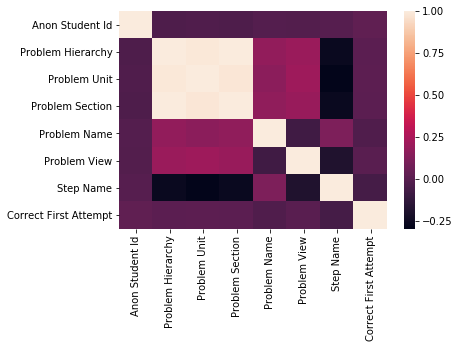

In [108]:
import seaborn as sns

sns.heatmap(Labelized_data.corr())

In [115]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

x_train = Labelized_data[['Anon Student Id','Problem Name','Step Name','Problem Hierarchy','Problem View','Problem Unit','Problem Section']]
y_train= Labelized_data['Correct First Attempt']



param_grid = {
    'n_estimators' : [130,150,170],
          
    'max_depth' : [x for x in range(7,16,3)],
    'max_features': [4,5,6],
    
    
} 

rf = RandomForestClassifier()

clf = GridSearchCV(rf,
                   param_grid, scoring = 'neg_mean_squared_error',cv = 10,n_jobs = -1)

clf.fit(x_train, y_train,sample_weight = None )

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [118]:
print (clf.best_params_)

{'max_depth': 10, 'max_features': 6, 'n_estimators': 150}


In [113]:
clf.cv_results_

{'mean_fit_time': array([ 2.78833095,  3.30294379,  4.96708465,  2.99553871,  3.67454823,
         5.46231763,  9.20045797, 11.43092942, 18.00917411, 11.16298135,
        13.84584737, 21.11735789, 14.12215447, 18.44407574, 28.22064137,
        20.46512032, 22.3790315 , 31.31520367]),
 'std_fit_time': array([0.22737318, 0.06278369, 0.03131241, 0.02644291, 0.05937776,
        0.07527128, 0.01755367, 0.07458446, 0.55386138, 0.19762392,
        0.0647956 , 0.58511585, 0.41861948, 0.51375277, 1.38482454,
        0.24580521, 1.96597021, 1.45750849]),
 'mean_score_time': array([0.21733173, 0.24093517, 0.3686316 , 0.20204274, 0.25080403,
        0.37401565, 0.28592658, 0.35798963, 0.5092605 , 0.29202771,
        0.36222053, 0.53015677, 0.43976307, 0.56149499, 0.95942235,
        0.56727862, 0.55246234, 0.81304256]),
 'std_score_time': array([0.02903643, 0.00241627, 0.00526381, 0.00332587, 0.00643122,
        0.00424326, 0.00294615, 0.00882799, 0.01689223, 0.00627302,
        0.00939911, 0.0097

In [86]:
p = 0;
n = 0;
for ind in traindata.index: 
    if traindata['Correct First Attempt'][ind] is '1':
        p+=1;
    else:
        n+=1;
print(p)
print(n)

0
232744


Let's begin asking some basic questions of the data

### How many students are interacting with the system?

In [6]:
# Take the column of anonimized student IDs and count the number of unique entries
print('Number of students: ', len(np.unique(traindata['Anon Student Id'])))

Number of students:  174


### How long does it take a student to solve any problem step on average?

In [7]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64

So ignoring all the students that did not solve a problem step correctly, the average duraction for any problem step was about 18 seconds.

Let's histogram this data to see the distribution.

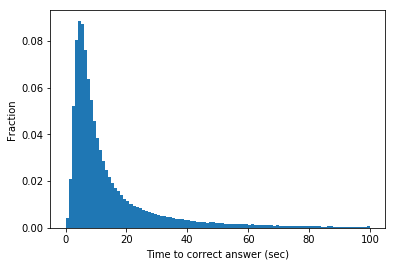

In [8]:
%matplotlib inline
hist = plt.hist(np.array(csd.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

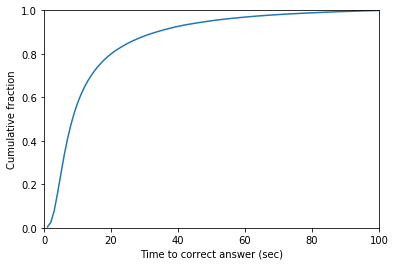

In [9]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,100,0,1.0))
plt.show()

The histogram shows visually what mere statistics hints at. The distribution of students is heavily weighted towards those who are solving problems in under 20 seconds. The cumulative distribution function (CDF) shows that roughly 80% of successful students solve the problem within 20 seconds. After 40 seconds, 90% of successful students have finished the problem. Almost no students take longer than 80 seconds.

### Completion time by problem

OK, let's ask a slightly harder question: how are students doing problem by problem? The answer will take several parts.

First, let's get the number of unique problems

In [10]:
# The unique identifier for each problem is the 'Problem Name'
problems = traindata['Problem Name']

In [11]:
# Get just the uniques
problems = np.unique(problems)
print('Number of unique problems: ', len(problems))

Number of unique problems:  1021


Then, let's compute which problems need the largest time on average.

In [12]:
pmedian_times = {}
for p in problems:
    pmedian_times[p] = traindata[traindata['Problem Name'] == p]['Correct Step Duration (sec)'].median()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
import operator

In [14]:
sorted_times = sorted(pmedian_times.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
print("The hardest top-5 problem and its average correct duration (sec).")
print(sorted_times[:5])

print("The earliest top-5 problem and its average correct duration (sec).")
print(sorted_times[len(sorted_times)-5:])

The hardest top-5 problem and its average correct duration (sec).
[('JAN13C', 65.0), ('TRANSFORMN022', 32.0), ('EG-FACTOR45', 30.0), ('BH1T33B', 25.0), ('EG-FACTOR47', 23.0)]
The earliest top-5 problem and its average correct duration (sec).
[('TRANSFORMN013', 1.25), ('TRANSFORMN014', 1.25), ('TRANSFORMG042', 1.0), ('TRANSFORMN004', 1.0), ('TRANSFORMN005', 1.0)]


Statistical results of problem difficulty

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


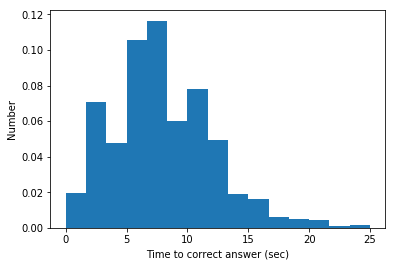

In [16]:
hist = plt.hist(np.array(list(pmedian_times.values())),bins=15,density=True,log=False,range=(0,25))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Number')
plt.show()

If we take the time to correct answer as the difficulty of a problem, the histogram shows visually the difficulties of all the problems. 

### Conclusion
There are many other interesting characteristic in this dataset.
Like, 
* After some practices, students may become better at solving problems.
* Same problem step for different students may request different knowledge components. Or for some problems, there is only one correct knowledge components

These may be some things you need to take consider into for the feature engineering part. We leave them for you to explore deeper.